<a href="https://colab.research.google.com/github/tiagodados/Dados/blob/master/CASE_BOSTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BUSINESS UNDERSTANDING
1.1 OBJETIVO DO NEGÓCIO

Precificação de casas em Boston nos Estados Unidos.

1.2 AVALIANDO A SITUAÇÃO

Para atender a demanda de realizar um levantamento dos preços das casas em Boston nos USA e apontar qual atributo melhor responde a Análise Exploratória de Dados (EDA), será preciso analisar os preços e valores do MEDV (Algo aproximado do Valor médio das casas). Devemos escolher três atributos para serem utilizados como "X" no modelo de regressão. Para auxiliar na tarefa, contamos com a base de dados fornecida pela empresa: Um arquivo em formato “.csv” contendo o dataset.

Como ferramentas de análise, contamos com a biblioteca Pandas, Numpy, Seaborn e outros voltada especificamente para Estatística utilizando Linguagem Python,PowerPoint e além de reuniões diárias via Google Meet e Whatsapp, para a comunicação entre os membros do time de desenvolvimento e a mentoria DNC. Os principais riscos encontrados até o momento no projete são: O prazo, uma vez que temos a data limite da duração do curso para desenvolvimento, validação e implementação da análise dos dados, entendimento dos indicadores utilizados para a geração da amostra presente no banco de dados.


1.3 OBJETIVOS E METAS

Dentre os objetivos e metas está treinar um modelo de Regressão Linear Simples para explorar os três atributos escolhidos na fase anterior.

Criar três modelos para averiguar qual deles é o melhor para prever o preço das casas.

Nossa proposta é analisar, agrupar e organizar os dados com informações concisas e de fácil entendimento, através de demonstrações montadas através de um Colab bem redigido, apontando o passo a passo das etapas de análise deste case, uma introdução e dados atuais sobre o problema.

O critério de sucesso deste projeto esta baseado nas respostas encontradas para os seguintes questionamentos da DNC:

1 - Fazer uma comparação dos gráficos de dispersão
2 - Separar os Trienos dos Testes
3 - Treinar e validar os modelos
4 - Criar uma visualização do modelo
5 - Escolher qual melhor modelo



DATA UNDERSTANDING

2.1 COLETA INICIAL E DESCRIÇÃO DOS DADOS

A fonte do material utilizado no projeto foi fornecida pela DNC, disponibilizada através da base de dados em CSV contendo os valores médios das casas na cidade de Boston. Este arquivo contento a base de dados foi coletado apenas uma vez e este é a base para o desenvolvimento de todo esse projeto.

O banco de dados possui apenas uma planilha, formada por quatorze colunas:
 

1. CRIM: taxa de criminalidade per capita por cidade
2. ZN: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

3. INDUS: proporção de hectares de negócios não varejistas por cidade
4. CHAS: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
5. NOX: concentração de óxidos nítricos (partes por 10 milhões)
6. RM: número médio de quartos por habitação
7. AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
8. DIS: distâncias ponderadas para cinco centros de emprego de Boston
9. RAD: índice de acessibilidade às rodovias radiais
10. IMPOSTO: valor total do imposto predial por 10.000 dólares
11. PTRATIO: relação aluno-professor por município
12. B: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
13. LSTAT: % status mais baixo da população
14. MEDV: Valor médio de casas ocupadas pelo proprietário em US$ 1.000tem da lista.

e um total de 506 linhas.

O método utilizado para o compartilhamento e coleta deste arquivo, acompanha o encaminhamento dos dados das Casas em Boston e posteriormente, a disponibilização do arquivo para a nossa equipe de desenvolvimento (GRUPO IDS1G01). Não enfrentamos problemas técnicos em relação a base de dados disponibilizada pela DNC.

2.2 EXPLORANDO OS DADOS

Disponibilizado o arquivo, em formato de CSV, contendo as colunas já mencionadas acima, exploramos os dados contidos com o objetivo de identificar possíves erros de preenchimento, linhas em branco ou células não formatadas corretamente.

Esta é uma técnica exploratória da mineração de dados que auxilia na identificação de padrões e insights que tem como objetivo compreender o que aconteceu ou o que está acontecendo com base nos dados disponíveis.

O critério de sucesso deste case está pautado no comprimento das etapas estabelecidas e na indicação do melhor modelo.

DATA PREPARATION

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-i_e6vsgv
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-i_e6vsgv
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Resolved https://github.com/scikit-learn-contrib/py-earth to commit 400f84d435b7277

In [94]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn import tree


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('/content/dataset_HousingData.csv')
print("O Dataset contém ", df.shape)

O Dataset contém  (506, 14)


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().sum() #verificar os dados nulos

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
CRIM_mediana = df.CRIM.median()
df.fillna(CRIM_mediana, inplace = True)
df.CRIM.isnull().sum()

0

In [12]:
df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.rename(columns={'CRIM': 'TX CRIM', "MEDV": 'VALOR MÉDIO', 'RM': 'Nº QUARTOS', 'DIS': 'DISTANCIA CENTRO BOSTON'})

,TX CRIM,ZN,INDUS,CHAS,NOX,Nº QUARTOS,AGE,DISTANCIA CENTRO BOSTON,RAD,TAX,PTRATIO,B,LSTAT,VALOR MÉDIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,0.253715,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,0.253715,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [14]:
df.corr() # CORR gera uma correlação entre as colunas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185389,0.380530,-0.049658,0.410971,-0.220045,0.329252,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.412172,-0.383895
ZN,-0.185389,1.000000,-0.483924,-0.037801,-0.498751,0.312422,-0.470706,0.632625,-0.300231,-0.304504,-0.394852,0.170081,-0.362330,0.362411
INDUS,0.380530,-0.483924,1.000000,0.067679,0.692070,-0.340329,0.490516,-0.663972,0.566068,0.688802,0.373498,-0.342152,0.494989,-0.442641
CHAS,-0.049658,-0.037801,0.067679,1.000000,0.078559,0.089103,0.062612,-0.088739,0.013811,-0.019744,-0.107415,0.047915,-0.035148,0.167054
NOX,0.410971,-0.498751,0.692070,0.078559,1.000000,-0.302188,0.627966,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.550228,-0.427321
RM,-0.220045,0.312422,-0.340329,0.089103,-0.302188,1.000000,-0.227657,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.585716,0.695360
AGE,0.329252,-0.470706,0.490516,0.062612,0.627966,-0.227657,1.000000,-0.642388,0.420622,0.460149,0.239666,-0.214856,0.504694,-0.356897
DIS,-0.366025,0.632625,-0.663972,-0.088739,-0.769230,0.205246,-0.642388,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.457906,0.249929
RAD,0.601224,-0.300231,0.566068,0.013811,0.611441,-0.209847,0.420622,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.439170,-0.381626
TAX,0.560469,-0.304504,0.688802,-0.019744,0.668023,-0.292048,0.460149,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.495124,-0.468536


<Axes: >

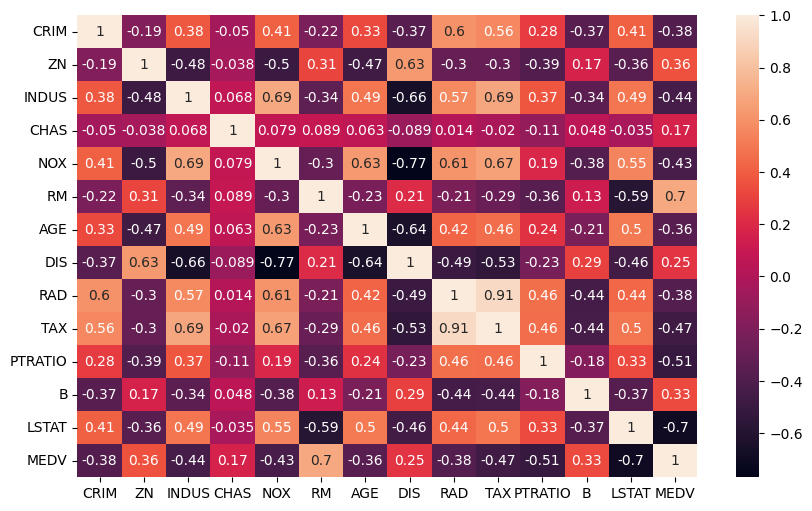

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

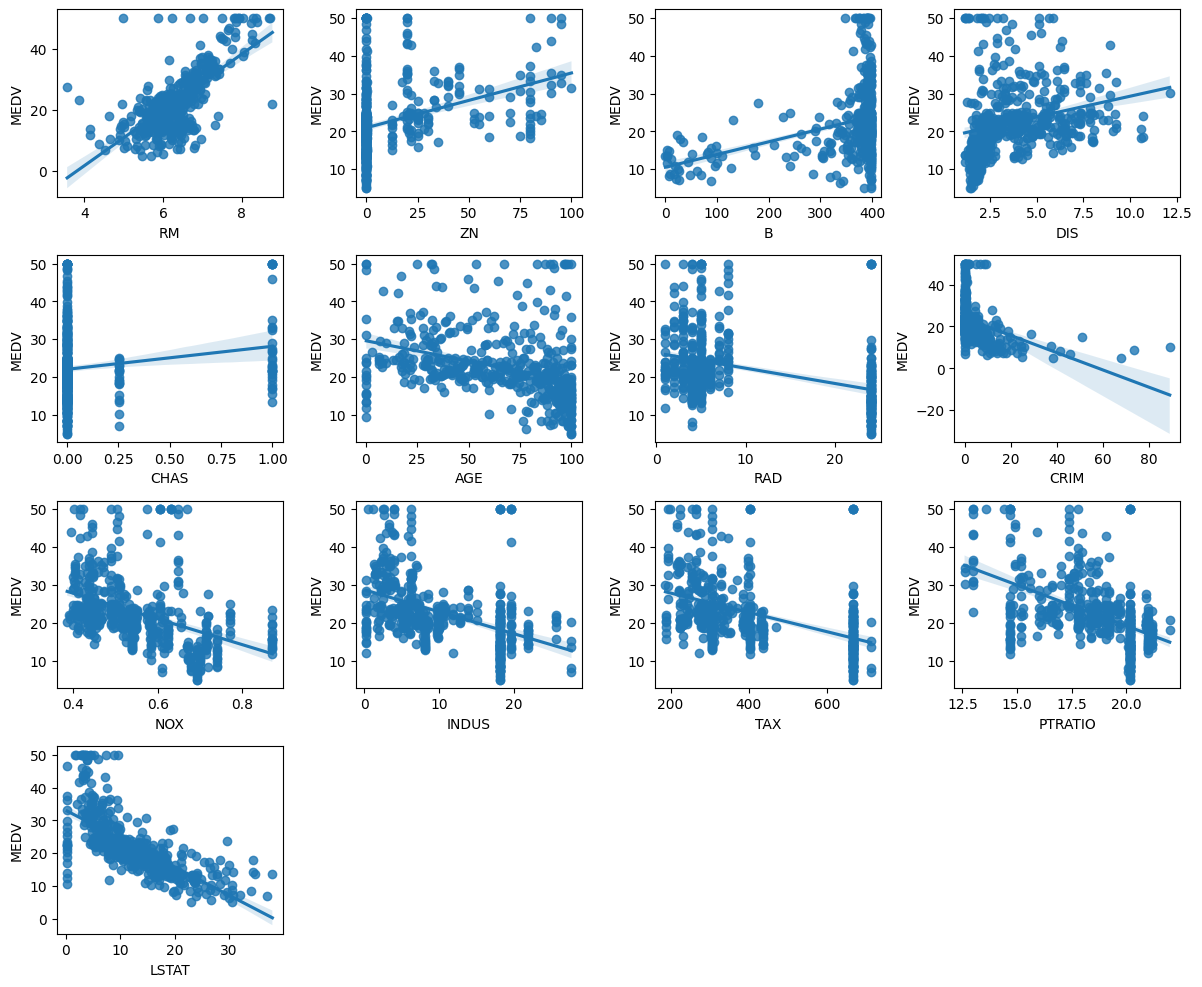

In [16]:
k = 14
fig = plt.figure(figsize=(12,12))
corrmat = df.corr()
cols = corrmat.nlargest(k, "MEDV")["MEDV"].index

for i in np.arange(1,k):
    X_train = df[cols[i]]
    ax = fig.add_subplot(5,4,i)
    sns.regplot(x=X_train, y=df['MEDV'])
plt.tight_layout()
plt.show()

RM e Lstat são os parâmetros que possuem maior correlação com MEDV

In [100]:
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('x_treino e x_teste são formas {} e {}'.format(X_train.shape, X_test.shape))
print('y_treino and y_teste são formas {} e {}'.format(y_train.shape, y_test.shape))

x_treino e x_teste são formas (404, 13) e (102, 13)
y_treino and y_teste são formas (404,) e (102,)


In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# REGRESSÃO LINEAR
reg = LinearRegression()


reg.fit(X_train, y_train)


reg_cv_results_train = cross_val_score(reg, X_train, y_train, cv=5)
print("regressão Linear (Treino): ", np.mean(reg_cv_results_train))

reg_cv_results_test = cross_val_score(reg, X_test, y_test, cv=5)
print("Regressão Linear (Teste): ", np.mean(reg_cv_results_test))

regressão Linear (Treino):  0.7317439821081153
Regressão Linear (Teste):  0.4461684284320505


In [53]:
# MODELO RIDGE DE REGRESSÃO
ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

ridge_cv_results_train = cross_val_score(ridge, X_train, y_train, cv=5)
print("Modelo Ridge de Regressão (Treino): ", np.mean(ridge_cv_results_train))

ridge_cv_results_test = cross_val_score(ridge, X_test, y_test, cv=5)
print("Modelo Ridge de Regressão (Teste): ", np.mean(ridge_cv_results_test))

Modelo Ridge de Regressão (Treino):  0.7317975736752161
Modelo Ridge de Regressão (Teste):  0.45028113583602564


In [54]:
#MODELO LASSO DE REGRESSÃO
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)


lasso_cv_results_train = cross_val_score(lasso, X_train, y_train, cv=5)
print("Modelo Lasso de Regressão(Treino): ", np.mean(lasso_cv_results_train))

lasso_cv_results_test = cross_val_score(lasso, X_test, y_test, cv=5)
print("Modelo Lasso de Regressão (Teste): ", np.mean(lasso_cv_results_test))

Modelo Lasso de Regressão(Treino):  0.730189775461733
Modelo Lasso de Regressão (Teste):  0.47982162589473465


In [69]:
# MODELO RANDON FOREST
rf = RandomForestRegressor()

rf.fit(X_train, y_train)


rf_cv_results_train = cross_val_score(rf, X_train, y_train, cv=5)
print("Modelo de classificação Forest (Treino): ", np.mean(rf_cv_results_train))

rf_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Modelo de classificação Forest (Teste): ", np.mean(rf_cv_results_test))

Modelo de classificação Forest (Treino):  0.8176976318480111
Modelo de classificação Forest (Teste):  0.7131244237213424


In [61]:
# MODELO XGB
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_cv_results_train = cross_val_score(xgb, X_train, y_train, cv=5)
print("Modelo XGBoost (Treino): ", np.mean(xgb_cv_results_train))

xgb_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Modelo XGBoost (Teste): ", np.mean(xgb_cv_results_test))

Modelo XGBoost (Treino):  0.8470314496921466
Modelo XGBoost (Teste):  0.7061173876385672


In [117]:
# MODELO DECISION TREE
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_cv_results_train = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree (Treino): ", np.mean(dt_cv_results_train))

dt_cv_results_test = cross_val_score(dt, X_test, y_test, cv=5)
print("Decision Tree (Teste): ", np.mean(dt_cv_results_test))

Decision Tree (Treino):  0.6641068278837737
Decision Tree (Teste):  0.4701183907599207


In [65]:
tabela_resultado = pd.DataFrame([[np.mean(reg_cv_results_train), np.mean(reg_cv_results_test)],
                             [np.mean(ridge_cv_results_train), np.mean(ridge_cv_results_test)],
                             [np.mean(lasso_cv_results_train), np.mean(lasso_cv_results_test)],
                             [np.mean(rf_cv_results_train), np.mean(rf_cv_results_test)],
                             [np.mean(xgb_cv_results_train), np.mean(xgb_cv_results_test)],
                             [np.mean(dt_cv_results_train), np.mean(dt_cv_results_test)]],
                            columns=['Treino', 'Teste'],
                            index=["Regressão Linear","Ridge Regressão","Lasso Regressão",
                                   "Random Forest", "XGBoost Regressão", "Decision Tree"])
pd.options.display.precision = 3
tabela_resultado

,Treino,Teste
Regressão Linear,0.732,0.446
Ridge Regressão,0.732,0.450
Lasso Regressão,0.730,0.480
Random Forest,0.821,0.718
XGBoost Regressão,0.847,0.706
Decision Tree,0.736,0.411


In [66]:
tabela_resultado['Resíduo'] = tabela_resultado['Treino'] - tabela_resultado['Teste'];
tabela_resultado.head()

,Treino,Teste,Resíduo
Regressão Linear,0.732,0.446,0.286
Ridge Regressão,0.732,0.450,0.282
Lasso Regressão,0.730,0.480,0.250
Random Forest,0.821,0.718,0.103
XGBoost Regressão,0.847,0.706,0.141


De todos os Modelos treinados e testados o que apresentou o melhor resultado foi Randon Forest